In [39]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
def random_graph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    for i in range(N):
        for j in range(i+1, N):
            q = random.uniform(0, 1)
#            print(f'i = {i}; j = {j}; q = {q}')
            if q < p:
                G.add_edge(i, j)
    return G

In [18]:
N = 2000
p_1 = 0.3
p_2 = 0.5
p_3 = 0.8
random_1 = random_graph(N, p_1)
random_2 = random_graph(N, p_2)
random_3 = random_graph(N, p_3)

In [19]:
print(f"Random graph with p = {p_1} has {nx.number_of_nodes(random_1)} nodes and {nx.number_of_edges(random_1)} edges")
print(f"Random graph with p = {p_2} has {nx.number_of_nodes(random_2)} nodes and {nx.number_of_edges(random_2)} edges")
print(f"Random graph with p = {p_3} has {nx.number_of_nodes(random_3)} nodes and {nx.number_of_edges(random_3)} edges")

Random graph with p = 0.3 has 2000 nodes and 599234 edges
Random graph with p = 0.5 has 2000 nodes and 998470 edges
Random graph with p = 0.8 has 2000 nodes and 1598970 edges


In [22]:
def expect_av_degree_rand(N, p):
    return p * (N - 1)

In [21]:
def real_av_degree_rand(G):
    return 2 * nx.number_of_edges(G) / nx.number_of_nodes(G)

In [26]:
k_av_exp_1 = expect_av_degree_rand(N, p_1)
k_av_real_1 = real_av_degree_rand(random_1)

k_av_exp_2 = expect_av_degree_rand(N, p_2)
k_av_real_2 = real_av_degree_rand(random_2)

k_av_exp_3 = expect_av_degree_rand(N, p_3)
k_av_real_3 = real_av_degree_rand(random_3)

In [28]:
print(f"Random graph with p = {p_1} has average degree expexted: {k_av_exp_1} and real: {k_av_real_1}")
print(f"Random graph with p = {p_2} has average degree expexted: {k_av_exp_2} and real: {k_av_real_2}")
print(f"Random graph with p = {p_3} has average degree expexted: {k_av_exp_3} and real: {k_av_real_3}")

Random graph with p = 0.3 has average degree expexted: 599.6999999999999 and real: 599.234
Random graph with p = 0.5 has average degree expexted: 999.5 and real: 998.47
Random graph with p = 0.8 has average degree expexted: 1599.2 and real: 1598.97


In [32]:
def var(N, p):
    return p * (1 - p) * (N - 1)

In [34]:
var_1 = var(N, p_1)
var_2 = var(N, p_2)
var_3 = var(N, p_3)

In [35]:
print(f"Random graph with p = {p_1} has variance of the degree distribution: {var_1}")
print(f"Random graph with p = {p_2} has variance of the degree distribution: {var_2}")
print(f"Random graph with p = {p_3} has variance of the degree distribution: {var_3}")

Random graph with p = 0.3 has variance of the degree distribution: 419.78999999999996
Random graph with p = 0.5 has variance of the degree distribution: 499.75
Random graph with p = 0.8 has variance of the degree distribution: 319.84


In [ ]:
nx.degree_histogram(random_1)

In [45]:
max(nx.degree_histogram(random_1))

54

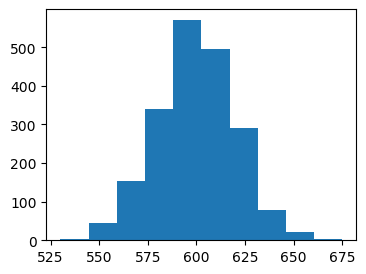

In [77]:
degrees_1 = sorted((d for n, d in random_1.degree()), reverse=True)
plt.figure(figsize = (4, 3))
plt.hist(degrees_1)
plt.show()

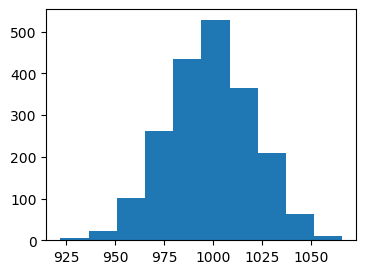

In [69]:
degrees_2 = sorted((d for n, d in random_2.degree()), reverse=True)
plt.figure(figsize = (4, 3))
plt.hist(degrees_2)
plt.show()

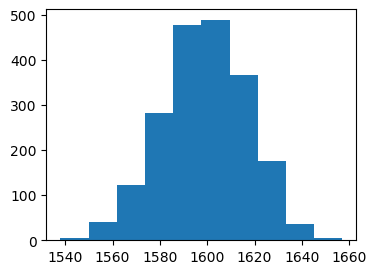

In [70]:
degrees_3 = sorted((d for n, d in random_3.degree()), reverse=True)
plt.figure(figsize = (4, 3))
plt.hist(degrees_3)
plt.show()

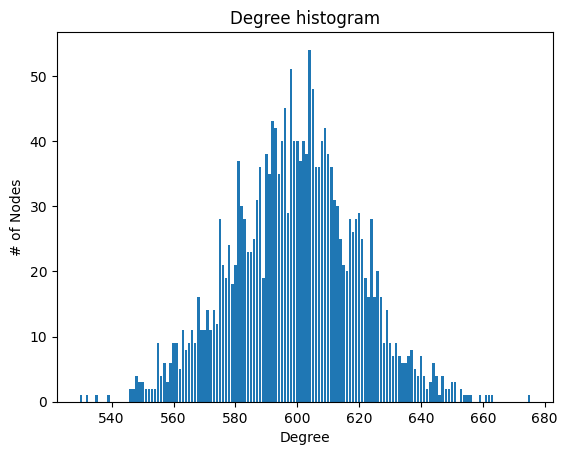

In [75]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = random_1

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")
plt.show()

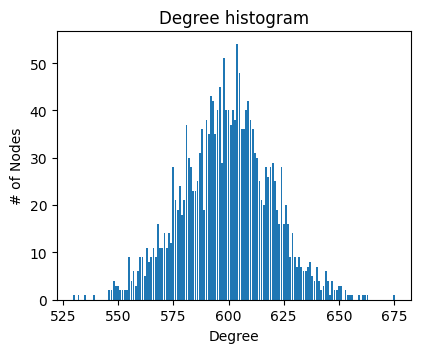

In [61]:
#Connected components of G, Degree Rank Plot, Degree histogram

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#G = nx.gnp_random_graph(100, 0.02, seed=10374196)
G = random_1

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

